# Plot SDSS Galaxy Colors

In [1]:
from matplotlib import pyplot as plt

from astroML.datasets import fetch_sdss_galaxy_colors

In [2]:
data = fetch_sdss_galaxy_colors()

querying for 50000 objects
SELECT TOP 50000
  p.u, p.g, p.r, p.i, p.z, s.class, s.z, s.zerr
FROM PhotoObj AS p
  JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE 
  p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 20
  AND s.class <> 'UNKNOWN'
  AND s.class <> 'STAR'
  AND s.class <> 'SKY'
  AND s.class <> 'STAR_LATE'
finished.


In [3]:
type(data)

numpy.ndarray

In [4]:
data.shape

(50000,)

In [5]:
data

array([(18.55948, 17.31544, 16.71859, 16.32946, 16.09309, 'GALAXY', 0.08371136,  6.015205e-06),
       (19.37655, 19.09841, 18.98511, 18.71276, 18.73387, 'QSO', 1.614186  ,  3.798576e-04),
       (19.55025, 19.23416, 19.12857, 18.88795, 18.92883, 'QSO', 1.520577  , -1.000000e+00),
       ...,
       (17.65253, 16.39743, 15.9519 , 15.68106, 15.59404, 'GALAXY', 0.        ,  0.000000e+00),
       (18.51423, 17.20242, 16.74626, 16.49297, 16.32478, 'GALAXY', 0.03708797,  1.052507e-05),
       (19.35522, 17.93862, 17.49508, 17.15916, 16.96571, 'GALAXY', 0.1161983 ,  6.063283e-06)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('specClass', '<U6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

In [6]:
data_plot = data[::10]

Extract colors and spectral class.

In [14]:
ug = data_plot['u'] - data_plot['g']
gr = data_plot['g'] - data_plot['r']
spec_class = data_plot['specClass']

In [16]:
galaxies = (spec_class == 'GALAXY')
qsos = (spec_class == 'QSO')

Plot.

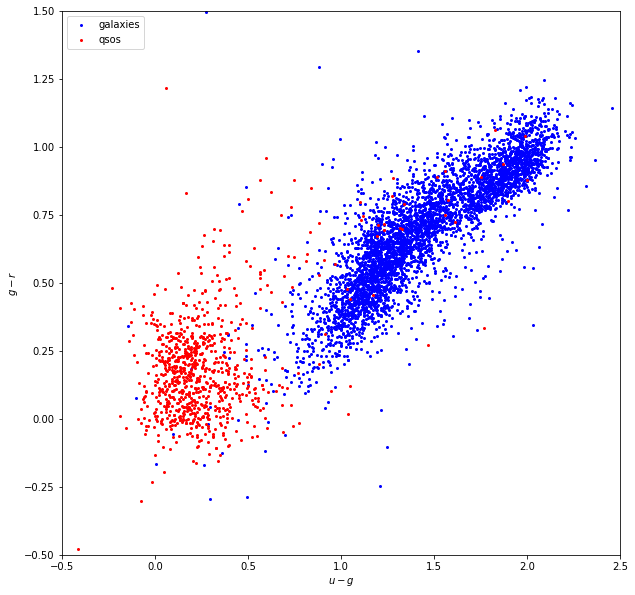

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 1.5)

ax.plot(ug[galaxies], gr[galaxies], '.', ms=4, c='b', label='galaxies')
ax.plot(ug[qsos], gr[qsos], '.', ms=4, c='r', label='qsos')

ax.legend(loc=2)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

plt.show()